# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pprint import pprint
import io
import requests
from sklearn.feature_selection import chi2
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import recall_score, precision_score,accuracy_score, average_precision_score, f1_score, log_loss

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours

import xgboost as xgb
import shap

import lime
from lime import lime_tabular

from functions import *

# Read dataset

In [2]:
data = pd.read_csv('Assets\Datasets\df_preprocessed.csv', delimiter=',')


## Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.75      0.83     16407
           1       0.29      0.62      0.40      2755

    accuracy                           0.73     19162
   macro avg       0.61      0.68      0.61     19162
weighted avg       0.83      0.73      0.77     19162



<Figure size 640x480 with 0 Axes>

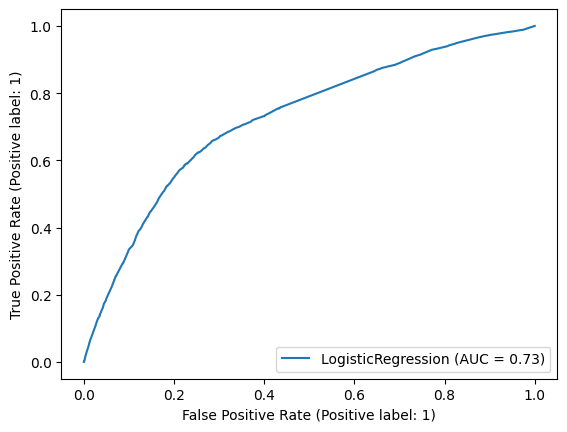

----------------------------
Confusion Matrix:


<Figure size 640x480 with 0 Axes>

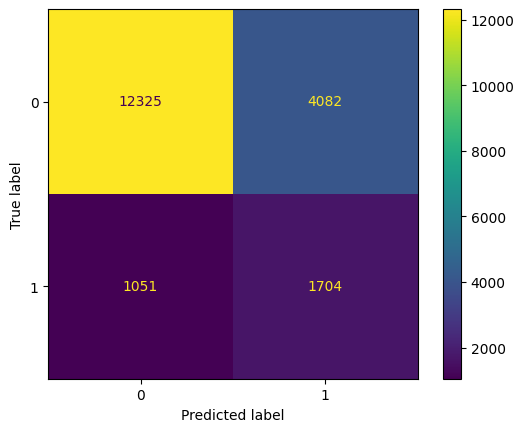


               variable  coefficient  odds ratio  Lower CI  Upper CI
1                 Fever     0.507476    1.661094  1.620903  1.702280
2                 Cough     0.226300    1.253952  1.224809  1.283788
3           Sore_Throat    -0.363319    0.695365  0.679685  0.711406
4            Runny_Nose    -0.192924    0.824545  0.805198  0.844357
5               Myalgia     0.301412    1.351766  1.320518  1.383754
6                Nausea     0.117537    1.124724  1.091474  1.158986
7              Diarrhea    -0.033148    0.967395  0.944074  0.991293
8         Loss_of_Smell     1.372709    3.946026  3.849206  4.045280
9   Shortness_of_Breath     0.379033    1.460871  1.348630  1.582455
10           NA_Symptom     0.180875    1.198265  1.156590  1.241443



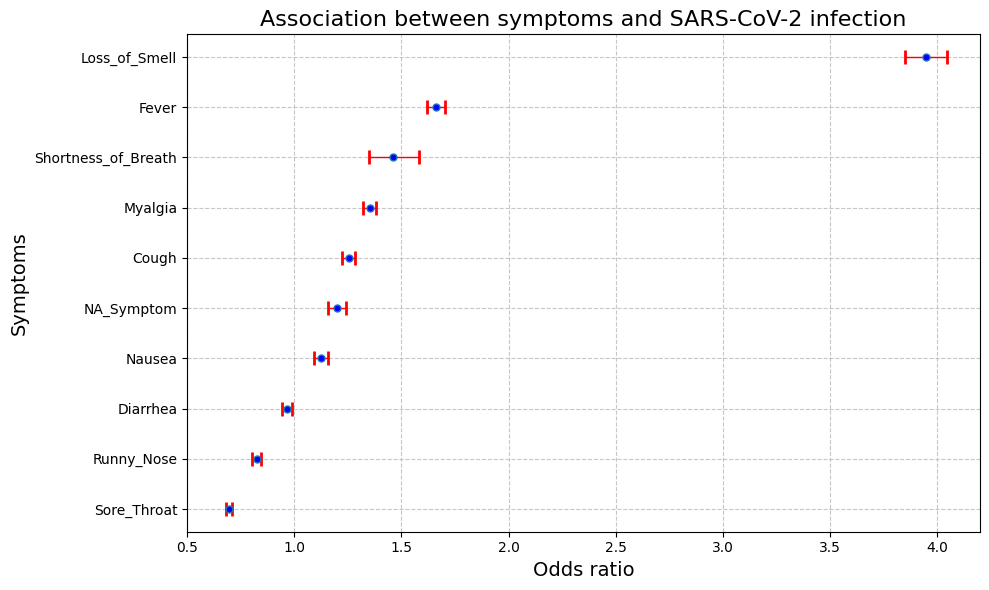

In [3]:
symptom_columns = data.iloc[:,7:17].columns.tolist()

# Extract the feature matrix (X) and the target vector (y)
X = data[symptom_columns]
y = data['Test_Result'].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_LR = LogisticRegression(class_weight='balanced', max_iter=1000)

X_train_RL, X_test_RL, y_train_RL, y_test_RL, y_pred_LR = metrics_ML(clf_LR, X_train, X_test, y_train, y_test)

# Calculate Odds ratios and confidence intervals
odds_ratio_ML, lowerCI, upperCI = calculate_coefficients_and_intervals(clf_LR, X_train_RL, symptom_columns)

# Plot the odds ratios with confidence intervals
lista_odds_ratio_sintomas = list(odds_ratio_ML)
plot_odds_ratios(lista_odds_ratio_sintomas, symptom_columns, lowerCI, upperCI)

### SHAP and LIME

---------------SHAP--------------------


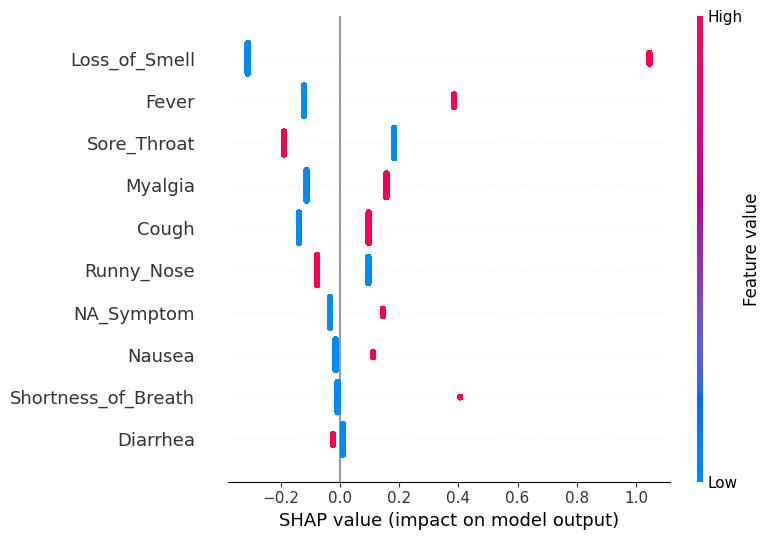


Feature importance :  [0.19852293 0.11782391 0.18581168 0.08586898 0.13239375 0.02907334
 0.01325157 0.5035379  0.01526793 0.05545026]


<Figure size 640x480 with 0 Axes>

In [4]:
Imp_shap_RL = SHAP_LINEAR(clf_LR, X_train_RL, X_test_RL)


---------------LIME--------------------



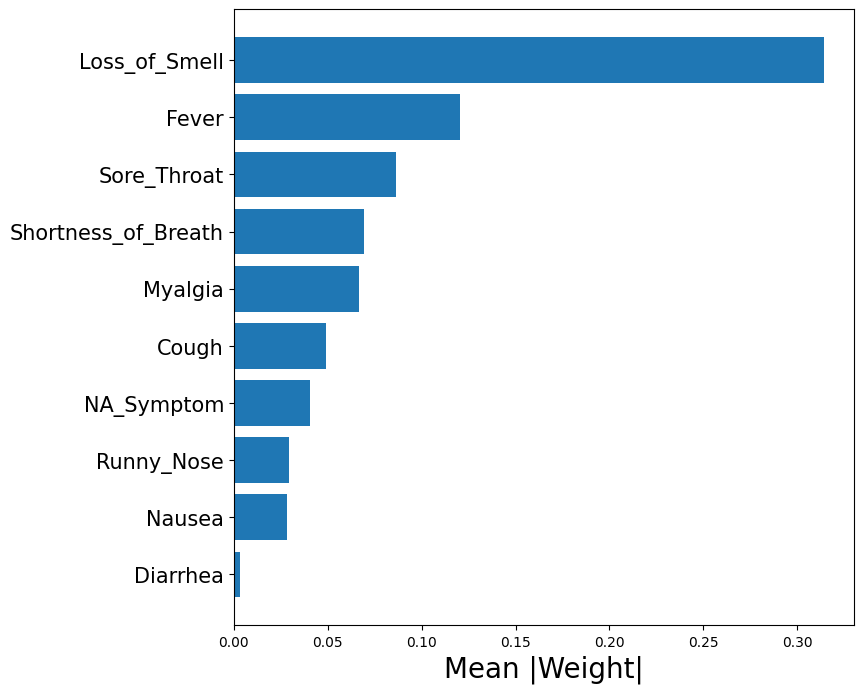

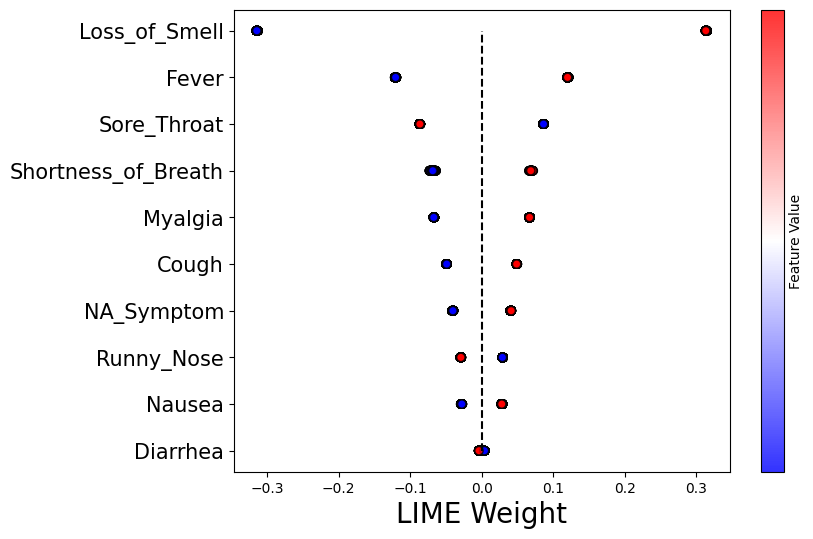

In [50]:
LIME(clf_LR, X_train_RL)

# Random Forest

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11642
           1       0.97      0.46      0.62      2691

    accuracy                           0.90     14333
   macro avg       0.93      0.73      0.78     14333
weighted avg       0.90      0.90      0.88     14333



<Figure size 640x480 with 0 Axes>

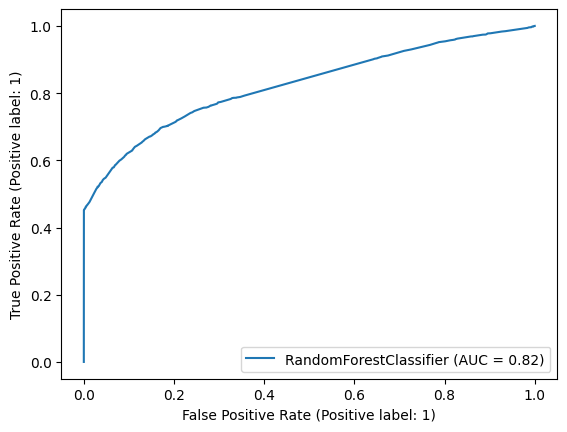

----------------------------
Confusion Matrix:


<Figure size 640x480 with 0 Axes>

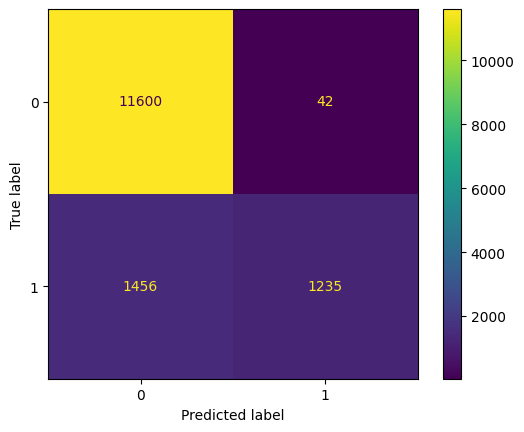

In [4]:
enn = EditedNearestNeighbours(kind_sel="all")
X, y = enn.fit_resample(X, y) #undersampling
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#clf_RF = RandomForestClassifier(bootstrap = True, max_depth= 80, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 250, class_weight='balanced')
clf_RF = RandomForestClassifier(bootstrap = True, max_depth= 80, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 250)
#clf = RandomForestClassifier()

X_train_RF, X_test_RF, y_train_RF, y_test_RF, y_pred_RF = metrics_ML(clf_RF, X_train, X_test, y_train, y_test)

### SHAP

In [5]:
data_sintoma = data.iloc[:,7:17]
data_sintoma['Test_Result'] = data['Test_Result']
label = data_sintoma.columns
number_features = len(label)
index_temp = np.arange(number_features)
selected_features = index_temp[0:number_features-1]

features=label[selected_features]

Imp_shap_RF = SHAP(clf_RF, X_test_RF, features)

---------------SHAP--------------------


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

### LIME

In [ ]:
LIME(clf_RF, X_train_RF)

# Xgboost

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11592
           1       0.97      0.43      0.60      2741

    accuracy                           0.89     14333
   macro avg       0.93      0.71      0.77     14333
weighted avg       0.90      0.89      0.87     14333



<Figure size 640x480 with 0 Axes>

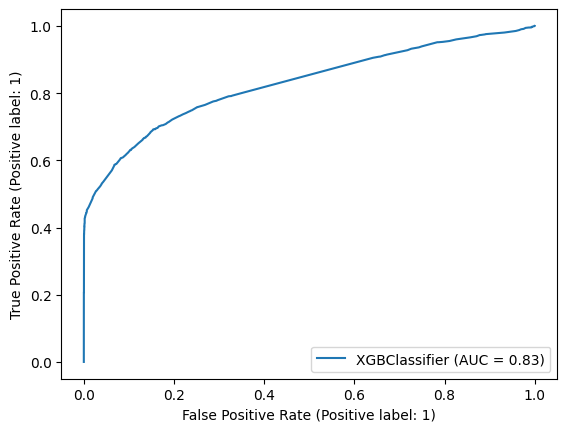

----------------------------
Confusion Matrix:


<Figure size 640x480 with 0 Axes>

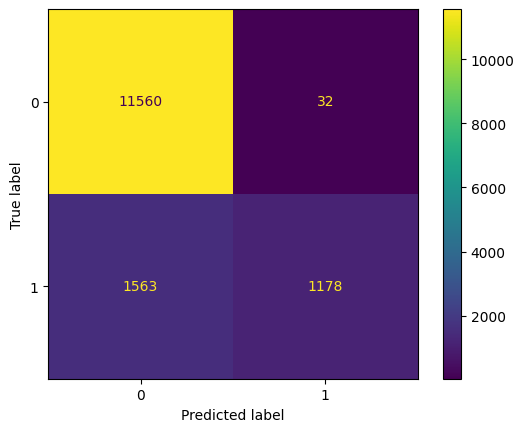

In [41]:
enn = EditedNearestNeighbours(kind_sel="all")
X_enn, y_enn = enn.fit_resample(X, y) #undersampling

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_enn, y_enn, test_size=0.3)

clf_xgb = xgb.XGBClassifier(n_estimators = 300, subsample = 0.99, learning_rate=0.05,colsample_bytree=1, random_state=137)

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb, y_pred_xgb  = metrics_ML(clf_xgb, X_train, X_test, y_train, y_test)

### SHAP 

In [ ]:
Imp_shap_xgb = SHAP(clf_xgb, X_train_xgb, X_test_xgb)

### LIME


In [ ]:
LIME(clf_xgb, X_train_xgb)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      7999
           1       0.98      0.55      0.70      2711

    accuracy                           0.88     10710
   macro avg       0.92      0.77      0.81     10710
weighted avg       0.89      0.88      0.87     10710



<Figure size 640x480 with 0 Axes>

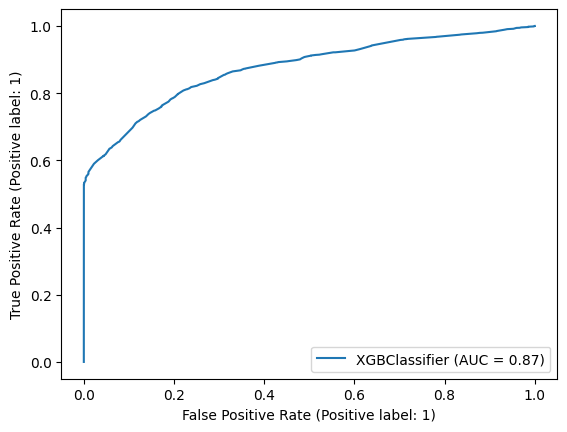

----------------------------
Matriz de teste :


<Figure size 640x480 with 0 Axes>

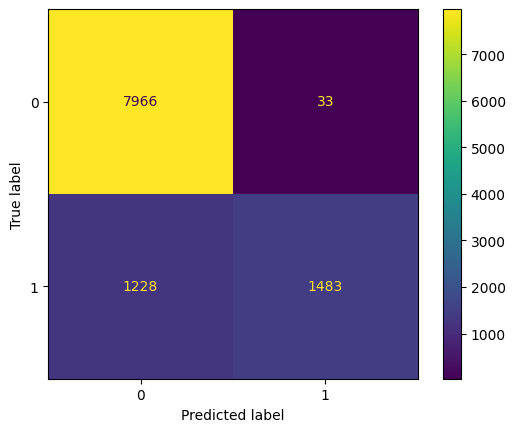

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


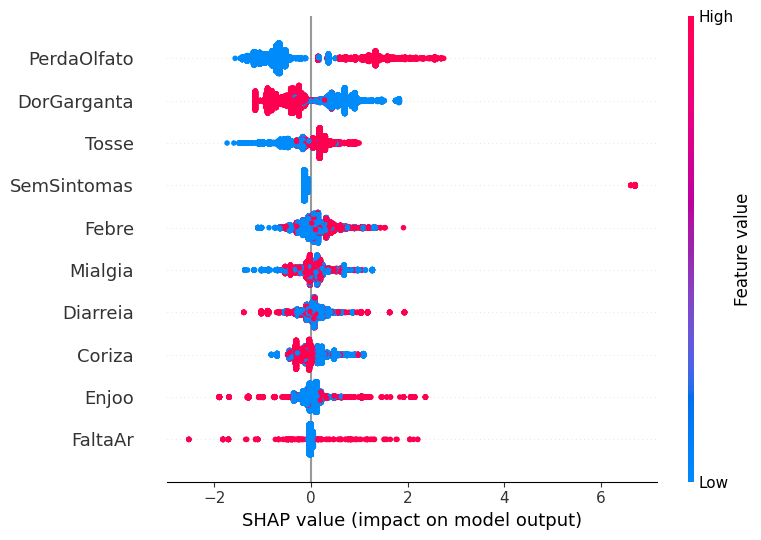


Feature importance :  [0.24898691 0.32496732 0.5690366  0.2081016  0.21894608 0.17942023
 0.20888512 0.95840937 0.0300351  0.30840325]


Text(0.5, 0, 'LIME Weight')

<Figure size 640x480 with 0 Axes>

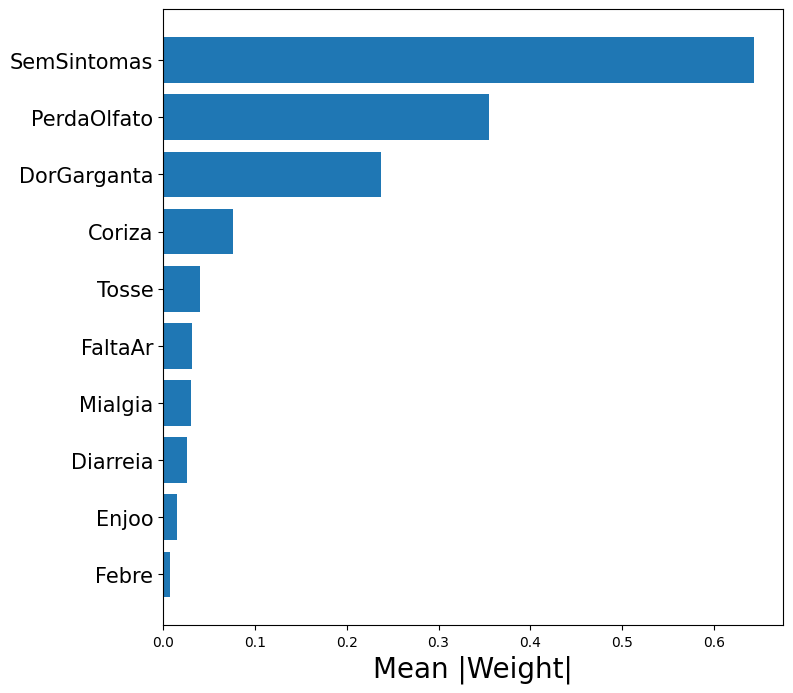

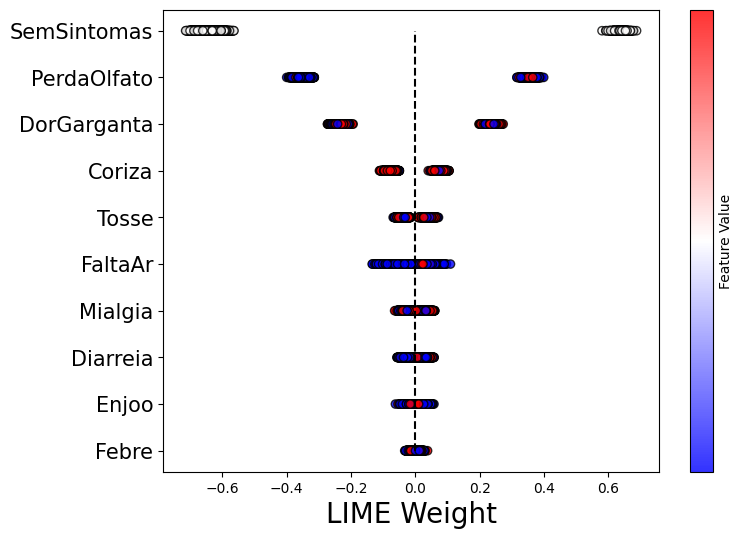

In [ ]:
#SHAP

explainer = shap.TreeExplainer(clf_xgb)

shap_values = explainer.shap_values(X_test_xgb)

shap.summary_plot(shap_values, X_test_xgb, feature_names = symptom_columns)
plt.figure()

print()
Imp_shap_xgb = np.mean(np.abs(shap_values), axis=0)
print('Feature importance : ', Imp_shap_xgb)



#LIME

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_xgb,
    feature_names = symptom_columns,
    class_names=['0', '1'],
    mode='classification'
)


def return_weights(exp):

    """Get weights from LIME explanation object"""

    exp_list = exp.as_map()[1]
    exp_list = sorted(exp_list, key=lambda x: x[0])
    exp_weight = [x[1] for x in exp_list]

    return exp_weight


weights = []

#Iterate over first 10000 rows in feature matrix
for x in range(0,10000):

    #Get explanation
    exp = explainer.explain_instance(data_row=X_test_xgb[x],
                                 predict_fn=clf_xgb.predict_proba)

    #Get weights
    exp_weight = return_weights(exp)
    weights.append(exp_weight)

#Create DataFrame
lime_weights = pd.DataFrame(data=weights,columns= symptom_columns)



#Get abs mean of LIME weights
abs_mean = lime_weights.abs().mean(axis=0)
abs_mean = pd.DataFrame(data={'feature':abs_mean.index, 'abs_mean':abs_mean})
abs_mean = abs_mean.sort_values('abs_mean')

#Plot abs mean
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

y_ticks = range(len(abs_mean))
y_labels = abs_mean.feature
plt.barh(y=y_ticks,width=abs_mean.abs_mean)

plt.yticks(ticks=y_ticks,labels=y_labels,size= 15)
plt.title('')
plt.ylabel('')
plt.xlabel('Mean |Weight|',size=20)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))

#Use same order as mean plot
y_ticks = range(len(abs_mean))
y_labels = abs_mean.feature

#plot scatterplot for each feature
for i,feature in enumerate(y_labels):

    feature_weigth = lime_weights[feature]

    feature_index = symptom_columns.get_loc(feature)
    feature_value = X[0:10000, feature_index]

    #feature_value = X[feature][0:100]

    plt.scatter(x=feature_weigth ,
                y=[i]*len(feature_weigth),
                c=feature_value,
                cmap='bwr',
                edgecolors='black',
               alpha=0.8)

plt.vlines(x=0,ymin=0,ymax=9,colors='black',linestyles="--")
plt.colorbar(label='Feature Value',ticks=[])

plt.yticks(ticks=y_ticks,labels=y_labels,size=15)
plt.xlabel('LIME Weight',size=20)

Curva ROC

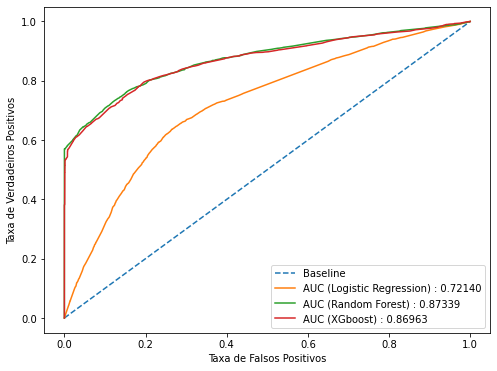

In [ ]:
# gerando uma baseline
baseline = [0 for _ in range(len(y_test_RL))]

# prevendo as probabilidades
lr_probs = clf_LR.predict_proba(X_test_RL)
rf_probs = clf_RF.predict_proba(X_test_RF)
xgb_probs = clf_xgb.predict_proba(X_test_xgb)

# mantendo as probabilidades somente para saída positiva
lr_probs_pos = lr_probs[:, 1]
rf_probs_pos = rf_probs[:, 1]
xgb_probs_pos = xgb_probs[:, 1]

base_fpr, base_tpr, _ = roc_curve(y_test_RL, baseline)
lr_fpr, lr_tpr, _ = roc_curve(y_test_RL, lr_probs_pos)
rf_fpr, rf_tpr, _ = roc_curve(y_test_RF, rf_probs_pos)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_xgb, xgb_probs_pos)

plt.figure(figsize=(8, 6))

plt.plot(base_fpr, base_tpr, linestyle='--', label='Baseline')
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='AUC (Logistic Regression) : {:.5f}'.format(roc_auc_score(y_test_RL, lr_probs_pos)))
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='AUC (Random Forest) : {:.5f}'.format(roc_auc_score(y_test_RF, rf_probs_pos)))
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='AUC (XGboost) : {:.5f}'.format(roc_auc_score(y_test_xgb, xgb_probs_pos)))

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')

Comparando as importâncias

In [ ]:
# Dúvida - Qual a diferença entre fazer a regressão logística com e sem o modelo de machine learning?
odds_ratio_ML = list(odds_ratio_ML)
df = pd.DataFrame(odds_ratio_ML, index = data_sintoma.iloc[:,0:10].columns, columns=['Odds_Ratio'])
odds_ratio_ML = list(odds_ratio_ML)
df['Feature importance XGBClassifier'] = Imp_shap_xgb
df['Feature importance Random Forest'] = Imp_shap_RF

#Normalização
scaler_minMax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minMax.fit_transform(df),columns = df.columns,index = data_sintoma.iloc[:,0:10].columns)

df_normalized = np.round(df_normalized,3)
#df_normalized
df_normalized.sort_values(by = 'Odds_Ratio', ascending = False)
display(df_normalized)
'''
df_normalized['Dif (Random Forest - XGBClassifier)']=df_normalized['Feature importance Random Forest']- df_normalized['Feature importance XGBClassifier']
df_normalized['Dif (Od  - XGBClassifier)']=df_normalized['Odds_Ratio']- df_normalized['Feature importance XGBClassifier']
df_normalized['Dif (Od  - Random Forest)']=df_normalized['Odds_Ratio']- df_normalized['Feature importance Random Forest']
df_normalized = df_normalized.iloc[:,3:6]

df_normalized['Dif (Random Forest - XGBClassifier)'] = np.round(df_normalized['Dif (Random Forest - XGBClassifier)'],3)
df_normalized['Dif (Od  - XGBClassifier)'] = np.round(df_normalized['Dif (Od  - XGBClassifier)'],3)
df_normalized['Dif (Od  - Random Forest)'] = np.round(df_normalized['Dif (Od  - Random Forest)'],3)
df_normalized
'''

#correlation = df_normalized.corr()
#plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
#plot

,Odds_Ratio,Feature importance XGBClassifier,Feature importance Random Forest
Febre,0.281,0.207,0.275
Tosse,0.167,0.262,0.342
DorGarganta,0.000,0.404,0.434
Coriza,0.041,0.160,0.302
Mialgia,0.190,0.119,0.300
Enjoo,0.141,0.090,0.153
Diarreia,0.090,0.106,0.209
PerdaOlfato,1.000,1.000,1.000
FaltaAr,0.231,0.000,0.000
SemSintomas,0.145,0.338,0.156


"\ndf_normalized['Dif (Random Forest - XGBClassifier)']=df_normalized['Feature importance Random Forest']- df_normalized['Feature importance XGBClassifier'] \ndf_normalized['Dif (Od  - XGBClassifier)']=df_normalized['Odds_Ratio']- df_normalized['Feature importance XGBClassifier']\ndf_normalized['Dif (Od  - Random Forest)']=df_normalized['Odds_Ratio']- df_normalized['Feature importance Random Forest']\ndf_normalized = df_normalized.iloc[:,3:6]\n\ndf_normalized['Dif (Random Forest - XGBClassifier)'] = np.round(df_normalized['Dif (Random Forest - XGBClassifier)'],3)\ndf_normalized['Dif (Od  - XGBClassifier)'] = np.round(df_normalized['Dif (Od  - XGBClassifier)'],3)\ndf_normalized['Dif (Od  - Random Forest)'] = np.round(df_normalized['Dif (Od  - Random Forest)'],3)\ndf_normalized\n"

Grid search na Regressão Logística - Não resulta em nenhuma diferença

In [ ]:
print()
print('------------------------ Teste dos Hiperparâmetros ------------------')
print()

print('parametros atuais', clf_LR.get_params())

vars = ['Febre','Tosse','DorGarganta','Coriza','Mialgia','Enjoo','Diarreia','PerdaOlfato','FaltaAr','SemSintomas']

X = data[vars]
y = data['test_result'].to_numpy()

clf_LR_cv = LogisticRegression(class_weight='balanced', max_iter=1000)
X_train_RL, X_test_RL, y_train_RL, y_test_RL = train_test_split(X, y, test_size=0.3, random_state = 0)

# Definir parâmetros a serem testados em grid search
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'solver':['newton-cg','lbfgs']} #ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

# Executar grid search para melhorar o desempenho do modelo
grid_search = GridSearchCV(estimator=clf_LR_cv, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_RL, y_train_RL)

print()
print("Parametros: {}".format(grid_search.best_params_))
print("AUC: {}".format(grid_search.best_score_))


------------------------ Teste dos Hiperparâmetros ------------------

parametros atuais {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Parametros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
AUC: 0.7222918440028939


Grid search no Random Forest

In [ ]:
print()
print('------------------------ Teste dos Hiperparâmetros ------------------')
print()

print('parametros atuais', clf_RF.get_params())

data_sintoma = data.iloc[:,7:17]
data_sintoma['test_result'] = data['test_result']
label = data_sintoma.columns
number_features = len(label)
index_temp = np.arange(number_features)
selected_features = index_temp[0:number_features-1]

features=label[selected_features]

X = data_sintoma[features].to_numpy()
y = data_sintoma['test_result'].to_numpy()

enn = EditedNearestNeighbours(kind_sel="all")
X, y = enn.fit_resample(X, y) #undersampling

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X, y, test_size=0.3)

clf_RF_cv = RandomForestClassifier()

param_grid = {'max_depth': [60,100],'min_samples_leaf': [1,2,3],'min_samples_split': [2,3,4],'n_estimators': [200,280]}

grid_search = GridSearchCV(estimator = clf_RF_cv, param_grid = param_grid, cv = 5, scoring='roc_auc',n_jobs = -1, verbose = 2)

grid_search.fit(X_train_RF, y_train_RF)
print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
print("AUC: {}".format(grid_search.best_score_))



------------------------ Teste dos Hiperparâmetros ------------------

parametros atuais {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 80, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
AUC: 0.8718367864693191


Grid search no XG-boost

In [ ]:
print()
print('------------------------ Teste dos Hiperparâmetros ------------------')
print()

print('parametros atuais', clf_xgb.get_params())

data_sintoma = data.iloc[:,7:17]
data_sintoma['test_result'] = data['test_result']
label = data_sintoma.columns
number_features = len(label)
index_temp = np.arange(number_features)
selected_features = index_temp[0:number_features-1]

features=label[selected_features]

X = data_sintoma[features].to_numpy()
y = data_sintoma['test_result'].to_numpy()

enn = EditedNearestNeighbours(kind_sel="all")
X, y = enn.fit_resample(X, y) #undersampling

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.3)

#clf_xgb = xgb.XGBClassifier(n_estimators = 300, subsample = 0.99, learning_rate=0.05,colsample_bytree=1, random_state=137)
clf_xgb_cv = xgb.XGBClassifier()

param_grid = {'max_depth': [60,100],'min_samples_leaf': [1,2,3],'min_samples_split': [2,3,4],'n_estimators': [200,280,350, 400]}

grid_search = GridSearchCV(estimator = clf_xgb_cv, param_grid = param_grid, cv = 5, scoring='roc_auc',n_jobs = -1, verbose = 2)

grid_search.fit(X_train_xgb, X_train_xgb)
print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
print("AUC: {}".format(grid_search.best_score_))

In [ ]:
#Análise do que pode ser feito na pesquisa

'''
For that, we compared five different machine learning techniques: Logistic Regression (LR) stepwise, Naïve Bayes (NB), Random Forest (RF),
Decision Tree using C5.0 (DT), and eXtreme gradient Boosting.
To address the imbalanced response variable (only 11.8% are positive tests) during model training, we also evaluated four different data balancing
techniques: Downsampling, Upsampling, Synthetic Minority Over-sampling Technique (SMOTE) [10], and Random Over-Sampling Examples (ROSE) [11]

During model training, for each combination of machine learning techniques and balancing strategies, we applied grid-search
hyperparameter optimization with 5-fold cross-validation, using the Area Under the ROC Curve (AUC) as the target metric.
It is independent of a specific cut-off value [12], which allows for a better evaluation of the model behavior during the training process.

'''

Seleção de Features com base nos resultados da interpretabilidade


              precision    recall  f1-score   support

           0       0.92      0.75      0.82     16346
           1       0.29      0.60      0.39      2810

    accuracy                           0.72     19156
   macro avg       0.60      0.67      0.61     19156
weighted avg       0.82      0.72      0.76     19156

Log loss = 0.61418
AUC = 0.71544
Average Precision = 0.29628



<Figure size 640x480 with 0 Axes>

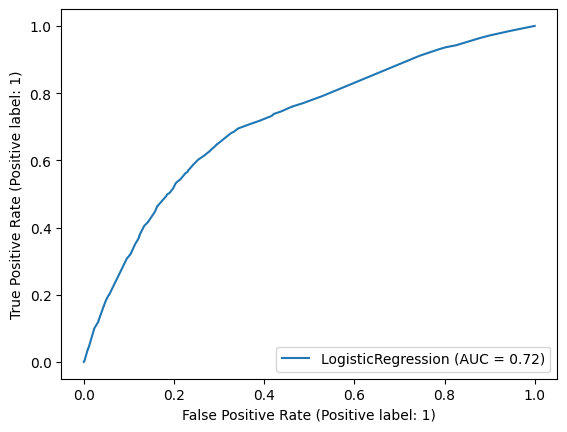

----------------------------
Matriz de teste :


<Figure size 640x480 with 0 Axes>

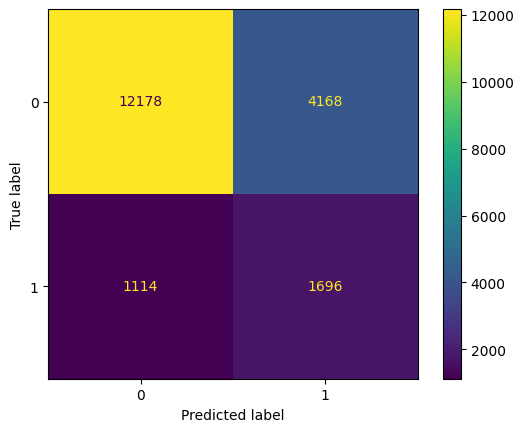

In [ ]:
# Regressão Logística - Machine Learning - Seleção de Features

vars = ['Febre','Tosse','DorGarganta','Coriza','Mialgia','PerdaOlfato','FaltaAr']

X = data[vars]
y = data['test_result'].to_numpy()

#enn = EditedNearestNeighbours(kind_sel="all")
#X, y = enn.fit_resample(X, y) #undersampling

X_train_RL, X_test_RL, y_train_RL, y_test_RL = train_test_split(X, y, test_size=0.3, random_state = 0)

#X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1) # devo fazer isso?

clf_LR = LogisticRegression(class_weight='balanced',max_iter=1000)
clf_LR.fit(X_train_RL, y_train_RL)
y_pred = clf_LR.predict(X_test_RL)

test_accuracy = clf_LR.score(X_test_RL, y_test_RL)

print(classification_report(y_test_RL, y_pred))

test_prob = clf_LR.predict_proba(X_test_RL)[:, 1]
test_pred = clf_LR.predict(X_test_RL)

print('Log loss = {:.5f}'.format(log_loss(y_test_RL, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test_RL, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test_RL, test_prob)))
print()

plt.figure()
RocCurveDisplay.from_estimator(clf_LR, X_test_RL, y_test_RL)
plt.show()

print('----------------------------')
print('Matriz de teste :')
plt.figure()

cm = confusion_matrix(y_test_RL, y_pred, labels=clf_LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_LR.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11041
           1       1.00      0.50      0.66      2714

    accuracy                           0.90     13755
   macro avg       0.94      0.75      0.80     13755
weighted avg       0.91      0.90      0.89     13755



<Figure size 640x480 with 0 Axes>

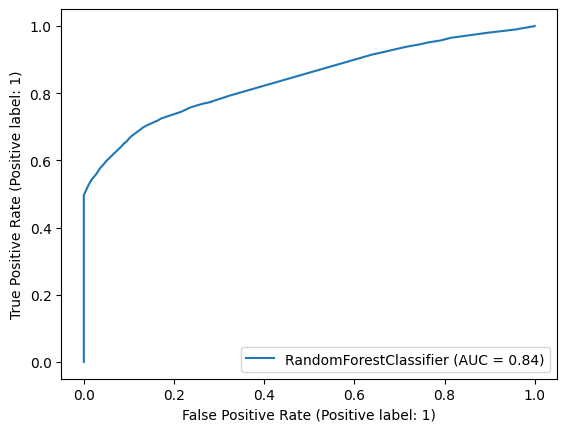

----------------------------
Matriz de teste :


<Figure size 640x480 with 0 Axes>

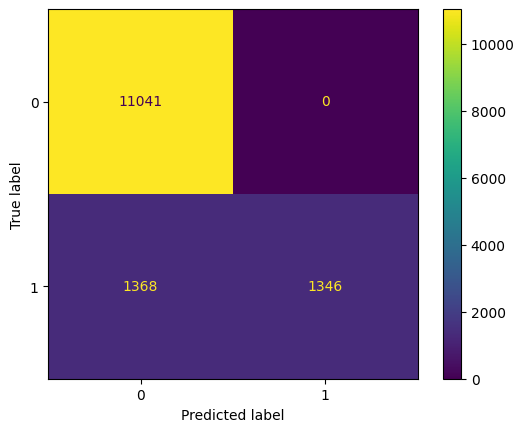

In [ ]:
#Classificação Random Forest de acordo com os sintomas - Seleção de Features
data_sintoma = data.iloc[:,7:16].drop(columns=['Diarreia', 'Enjoo'])
data_sintoma['test_result'] = data['test_result']
label = data_sintoma.columns
number_features = len(label)
index_temp = np.arange(number_features)
selected_features = index_temp[0:number_features-1]

features=label[selected_features]

X = data_sintoma[features].to_numpy()
y = data_sintoma['test_result'].to_numpy()

enn = EditedNearestNeighbours(kind_sel="all")
X, y = enn.fit_resample(X, y) #undersampling

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X, y, test_size=0.3)

clf_RF = RandomForestClassifier(bootstrap = True, max_depth= 80, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 250)
#clf = RandomForestClassifier()
clf_RF = clf_RF.fit(X_train_RF, y_train_RF)

y_pred_RF = clf_RF.predict(X_test_RF)

test_accuracy = clf_RF.score(X_test_RF, y_test_RF)

print(classification_report(y_test_RF, y_pred_RF))

plt.figure()
RocCurveDisplay.from_estimator(clf_RF, X_test_RF, y_test_RF)
plt.show()


print('----------------------------')
print('Matriz de teste :')
plt.figure()

cm = confusion_matrix(y_test_RF, y_pred_RF, labels=clf_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_RF.classes_)
disp.plot()
plt.show()


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11069
           1       1.00      0.49      0.65      2686

    accuracy                           0.90     13755
   macro avg       0.94      0.74      0.80     13755
weighted avg       0.91      0.90      0.89     13755



<Figure size 640x480 with 0 Axes>

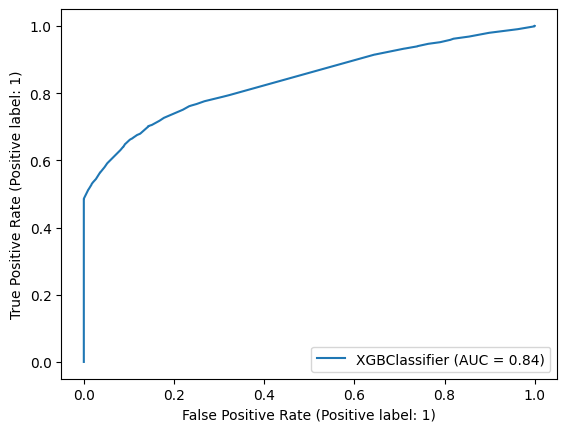

----------------------------
Matriz de teste :


<Figure size 640x480 with 0 Axes>

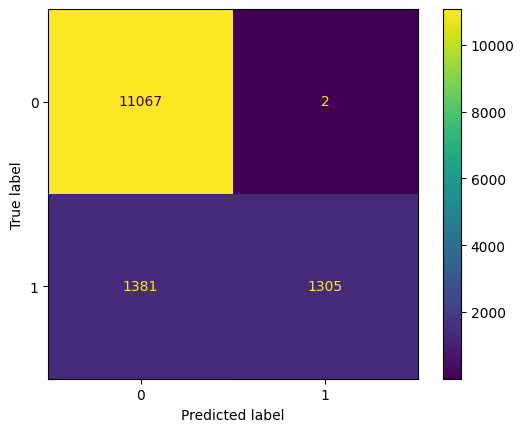

In [ ]:
# Classificação com Xgboost - Seleção de Features

label = data_sintoma.columns
number_features = len(label)
index_temp = np.arange(number_features)
selected_features = index_temp[0:number_features-1]

features=label[selected_features]

X = data_sintoma[features].to_numpy()
y = data_sintoma['test_result'].to_numpy()

enn = EditedNearestNeighbours(kind_sel="all")
X, y = enn.fit_resample(X, y) #undersampling

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.3)

clf_xgb = xgb.XGBClassifier(n_estimators = 300, subsample = 0.99, learning_rate=0.05,colsample_bytree=1, random_state=137)

clf_xgb = clf_xgb.fit(X_train_xgb, y_train_xgb)

y_pred_xgb = clf_xgb.predict(X_test_xgb)

test_accuracy = clf_xgb.score(X_test_xgb, y_test_xgb)

print(classification_report(y_test_xgb, y_pred_xgb))


plt.figure()
RocCurveDisplay.from_estimator(clf_xgb, X_test_xgb, y_test_xgb)
plt.show()

print('----------------------------')
print('Matriz de teste :')
plt.figure()

cm = confusion_matrix(y_test_xgb, y_pred_xgb, labels=clf_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_xgb.classes_)
disp.plot()
plt.show()

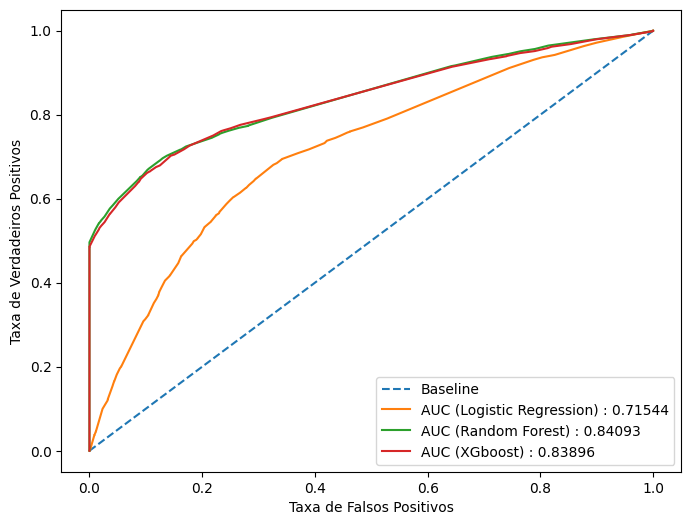

In [ ]:
# Curva ROC após a seleção de features

# gerando uma baseline
baseline = [0 for _ in range(len(y_test_RL))]

# prevendo as probabilidades
lr_probs = clf_LR.predict_proba(X_test_RL)
rf_probs = clf_RF.predict_proba(X_test_RF)
xgb_probs = clf_xgb.predict_proba(X_test_xgb)

# mantendo as probabilidades somente para saída positiva
lr_probs_pos = lr_probs[:, 1]
rf_probs_pos = rf_probs[:, 1]
xgb_probs_pos = xgb_probs[:, 1]

base_fpr, base_tpr, _ = roc_curve(y_test_RL, baseline)
lr_fpr, lr_tpr, _ = roc_curve(y_test_RL, lr_probs_pos)
rf_fpr, rf_tpr, _ = roc_curve(y_test_RF, rf_probs_pos)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_xgb, xgb_probs_pos)

plt.figure(figsize=(8, 6))

plt.plot(base_fpr, base_tpr, linestyle='--', label='Baseline')
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='AUC (Logistic Regression) : {:.5f}'.format(roc_auc_score(y_test_RL, lr_probs_pos)))
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='AUC (Random Forest) : {:.5f}'.format(roc_auc_score(y_test_RF, rf_probs_pos)))
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='AUC (XGboost) : {:.5f}'.format(roc_auc_score(y_test_xgb, xgb_probs_pos)))

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')

Os resultados não melhoraram
